<a href="https://colab.research.google.com/github/M-Kaif1/Insurance_Cost_Prediction_System/blob/main/Insurance_Cost_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSURANCE COST PREDICTION SYSTEM
✓ Dataset loaded successfully!
Dataset shape: (1338, 7)
Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

DATA EXPLORATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   

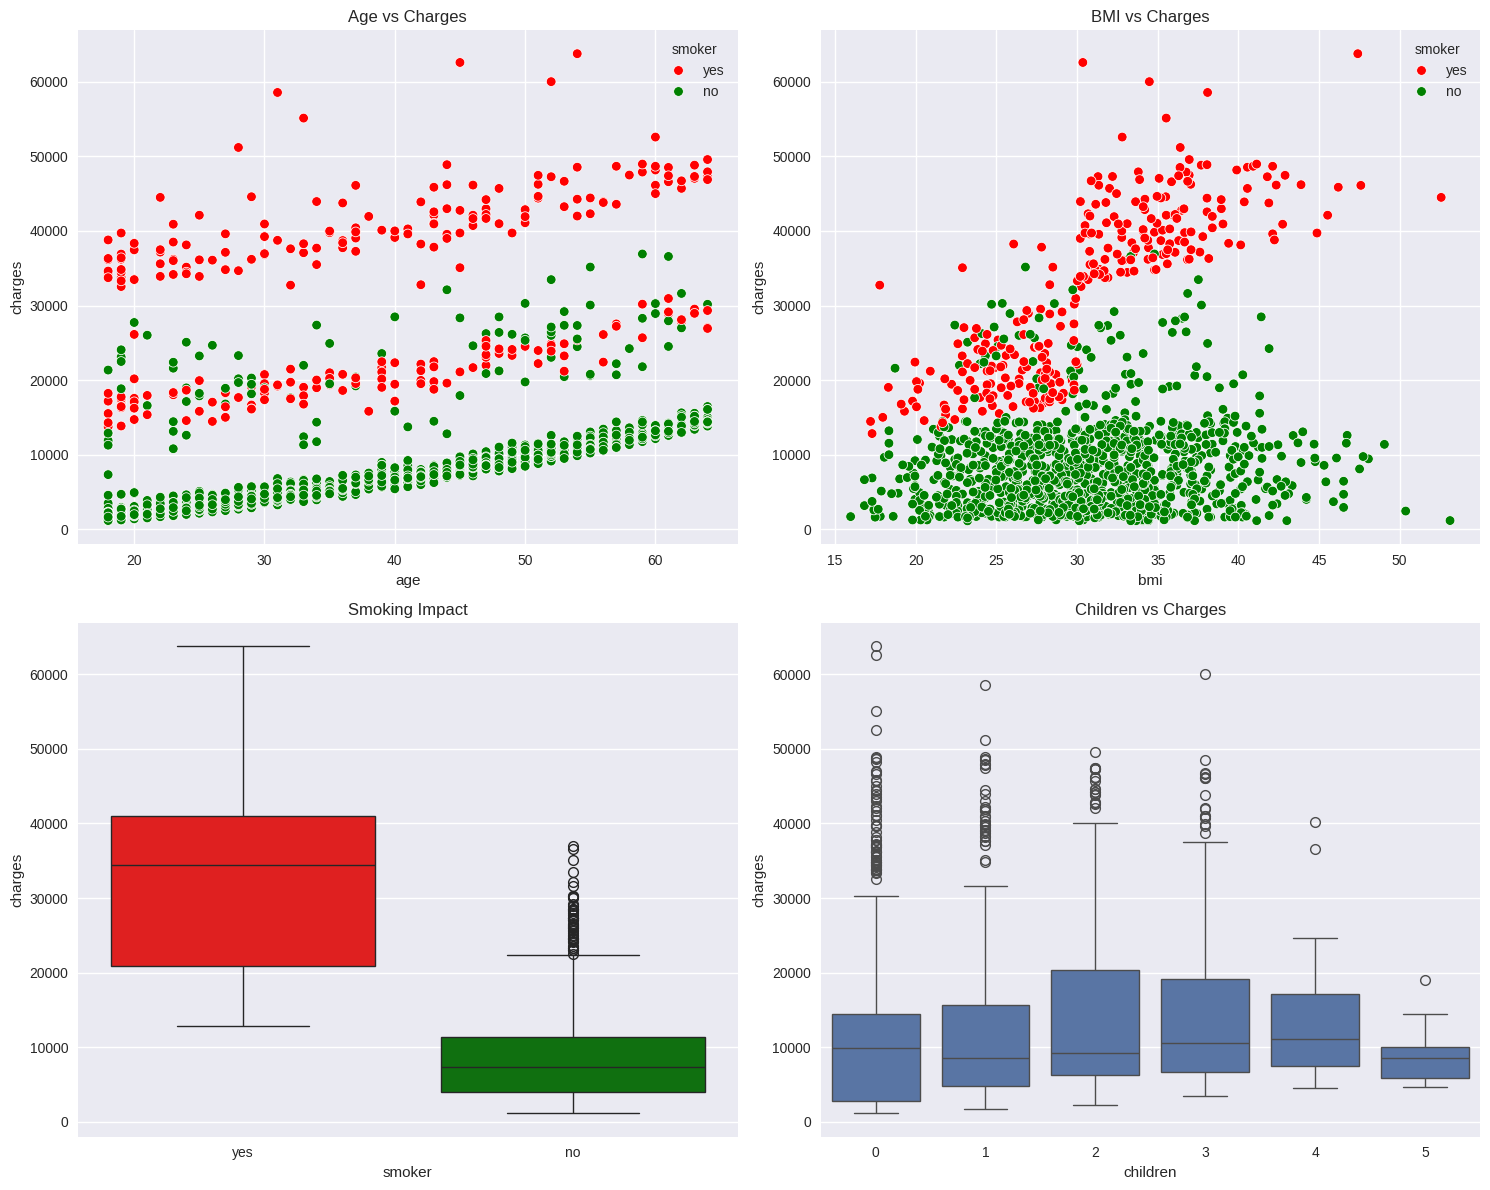

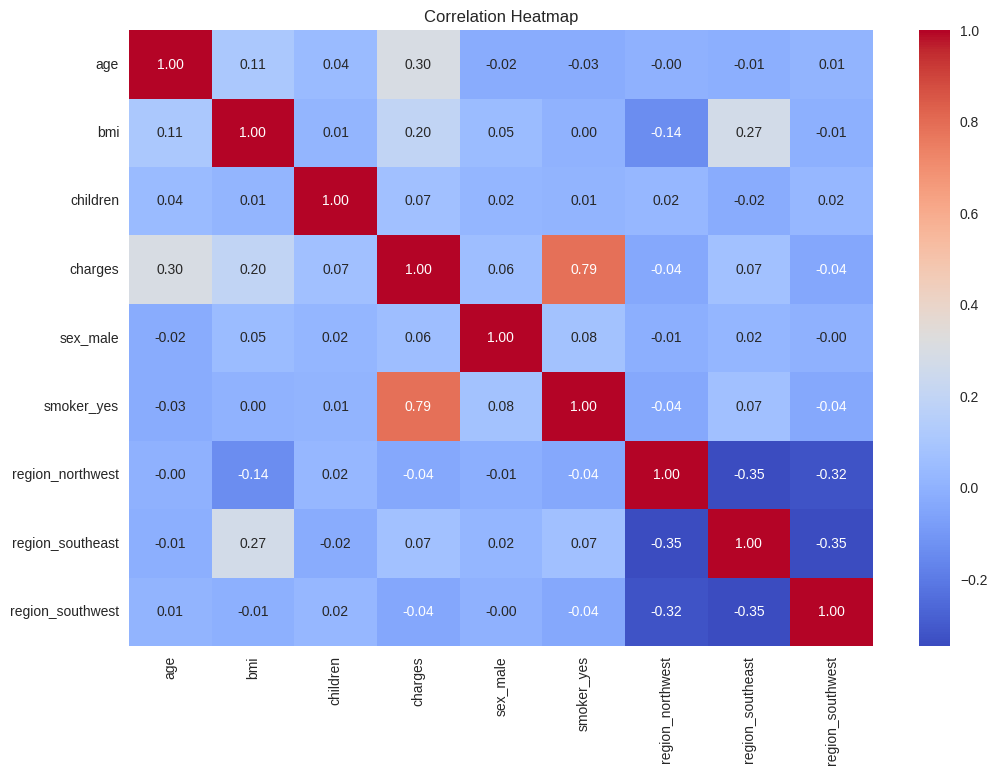


MODEL EVALUATION
MAE : $4,181.19
RMSE: $5,796.28
R²  : 0.7836


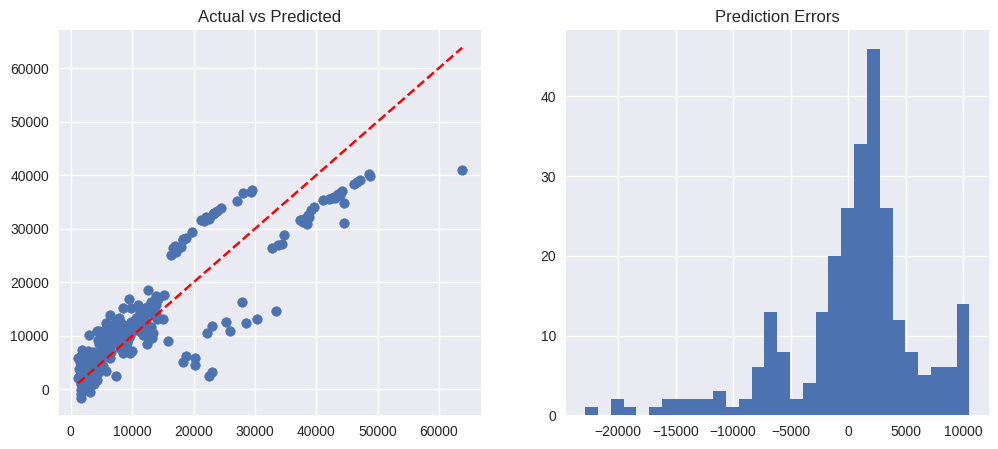

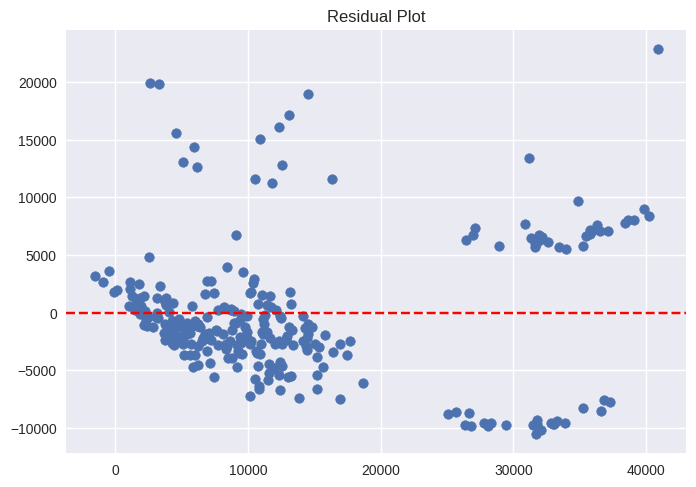


=== Interactive Insurance Cost Prediction ===

Age (18-64): 18
BMI (15-50): 20
Number of children (0-5): 3
Sex (male/female): female
Smoker (yes/no): yes
Region (northeast/northwest/southeast/southwest): northeast

✅ Predicted Insurance Cost: $24,363.16

Do you want to predict another? (yes/no): no


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")


# ============================================================
# 1. DATA LOADING AND PREPROCESSING
# ============================================================

class InsurancePredictor:
    def __init__(self):
        self.model = None
        self.preprocessor = None
        self.feature_names = None

    def load_and_prepare_data(self):
        print("=" * 70)
        print("INSURANCE COST PREDICTION SYSTEM")
        print("=" * 70)

        try:
            insurance = pd.read_csv("insurance.csv")
            print("✓ Dataset loaded successfully!")
        except FileNotFoundError:
            insurance = sns.load_dataset("insurance")
            print("⚠ Loaded seaborn dataset as fallback")

        print(f"Dataset shape: {insurance.shape}")
        print(f"Columns: {list(insurance.columns)}")
        return insurance

    def explore_data(self, insurance):
        print("\n" + "=" * 70)
        print("DATA EXPLORATION")
        print("=" * 70)
        print(insurance.info())
        print("\nSummary:\n", insurance.describe())
        print("\nMissing Values:\n", insurance.isnull().sum())
        return insurance


# ============================================================
# 2. VISUALIZATION MODULE
# ============================================================

class InsuranceVisualizer:
    def __init__(self):
        plt.style.use("seaborn-v0_8")

    def plot_relationships(self, insurance):
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        sns.scatterplot(data=insurance, x="age", y="charges", hue="smoker",
                        palette={"yes": "red", "no": "green"}, ax=axes[0, 0])
        axes[0, 0].set_title("Age vs Charges")

        sns.scatterplot(data=insurance, x="bmi", y="charges", hue="smoker",
                        palette={"yes": "red", "no": "green"}, ax=axes[0, 1])
        axes[0, 1].set_title("BMI vs Charges")

        sns.boxplot(data=insurance, x="smoker", y="charges",
                    palette={"yes": "red", "no": "green"}, ax=axes[1, 0])
        axes[1, 0].set_title("Smoking Impact")

        sns.boxplot(data=insurance, x="children", y="charges", ax=axes[1, 1])
        axes[1, 1].set_title("Children vs Charges")

        plt.tight_layout()
        plt.show()

    def plot_correlation_heatmap(self, insurance):
        encoded = pd.get_dummies(insurance, drop_first=True)
        plt.figure(figsize=(12, 8))
        sns.heatmap(encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()


# ============================================================
# 3. MODEL TRAINING MODULE
# ============================================================

class ModelTrainer:
    def __init__(self):
        self.model = None
        self.feature_names = None

    def prepare_features(self, insurance):
        X = insurance.drop("charges", axis=1)
        y = insurance["charges"]
        return X, y

    def create_preprocessing_pipeline(self):
        return ColumnTransformer([
            ("num", StandardScaler(), ["age", "bmi", "children"]),
            ("cat", OneHotEncoder(drop="first", sparse_output=False),
             ["sex", "smoker", "region"])
        ])

    def train_model(self, X_train, y_train):
        self.model = Pipeline([
            ("preprocessor", self.create_preprocessing_pipeline()),
            ("regressor", LinearRegression())
        ])
        self.model.fit(X_train, y_train)

        cat_features = self.model.named_steps["preprocessor"] \
            .named_transformers_["cat"] \
            .get_feature_names_out(["sex", "smoker", "region"])

        self.feature_names = ["age", "bmi", "children"] + list(cat_features)
        return self.model

    def evaluate_model(self, X_test, y_test):
        y_pred = self.model.predict(X_test)

        print("\n" + "=" * 70)
        print("MODEL EVALUATION")
        print("=" * 70)
        print(f"MAE : ${mean_absolute_error(y_test, y_pred):,.2f}")
        print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")
        print(f"R²  : {r2_score(y_test, y_pred):.4f}")

        self.plot_predictions(y_test, y_pred)
        self.plot_residuals(y_test, y_pred)

    def plot_predictions(self, y_test, y_pred):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(y_test, y_pred)
        plt.plot([y_test.min(), y_test.max()],
                 [y_test.min(), y_test.max()], "r--")
        plt.title("Actual vs Predicted")

        plt.subplot(1, 2, 2)
        plt.hist(y_pred - y_test, bins=30)
        plt.title("Prediction Errors")
        plt.show()

    def plot_residuals(self, y_test, y_pred):
        residuals = y_test - y_pred
        plt.scatter(y_pred, residuals)
        plt.axhline(0, color="red", linestyle="--")
        plt.title("Residual Plot")
        plt.show()


# ============================================================
# 4. INTERACTIVE PREDICTION MODULE WITH VALIDATION
# ============================================================

class InteractivePredictor:
    def __init__(self, trainer):
        self.trainer = trainer

    def run(self):
        print("\n=== Interactive Insurance Cost Prediction ===\n")

        while True:
            try:
                age = int(input("Age (18-64): "))
                if not (18 <= age <= 64):
                    print("⚠ Age should be between 18 and 64")
                    continue

                bmi = float(input("BMI (15-50): "))
                if not (15 <= bmi <= 50):
                    print("⚠ BMI should be between 15 and 50")
                    continue

                children = int(input("Number of children (0-5): "))
                if not (0 <= children <= 5):
                    print("⚠ Number of children should be between 0 and 5")
                    continue

                sex = input("Sex (male/female): ").lower()
                if sex not in ["male", "female"]:
                    print("⚠ Sex should be 'male' or 'female'")
                    continue

                smoker = input("Smoker (yes/no): ").lower()
                if smoker not in ["yes", "no"]:
                    print("⚠ Smoker should be 'yes' or 'no'")
                    continue

                region = input("Region (northeast/northwest/southeast/southwest): ").lower()
                if region not in ["northeast", "northwest", "southeast", "southwest"]:
                    print("⚠ Invalid region")
                    continue

                # Create DataFrame
                df = pd.DataFrame([{
                    "age": age,
                    "bmi": bmi,
                    "children": children,
                    "sex": sex,
                    "smoker": smoker,
                    "region": region
                }])

                # Predict
                pred = self.trainer.model.predict(df)[0]
                print(f"\n✅ Predicted Insurance Cost: ${pred:,.2f}\n")

                again = input("Do you want to predict another? (yes/no): ").lower()
                if again != "yes":
                    break

            except Exception as e:
                print(f"⚠ Invalid input. Error: {e}\n")


# ============================================================
# 5. MAIN EXECUTION
# ============================================================

def main():
    predictor = InsurancePredictor()
    visualizer = InsuranceVisualizer()
    trainer = ModelTrainer()

    # Load & Explore
    insurance = predictor.load_and_prepare_data()
    insurance = predictor.explore_data(insurance)

    # Visualize
    visualizer.plot_relationships(insurance)
    visualizer.plot_correlation_heatmap(insurance)

    # Train Model
    X, y = trainer.prepare_features(insurance)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    trainer.train_model(X_train, y_train)
    trainer.evaluate_model(X_test, y_test)

    # Interactive Prediction
    interactive = InteractivePredictor(trainer)
    interactive.run()


if __name__ == "__main__":
    main()
